In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
diabetes_data = pd.read_csv('pima_indians_diabetes.csv')

In [5]:
diabetes_data.shape

(776, 9)

In [6]:
diabetes_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Find the index upto which there are contiguous missing values for all the features
def check_missing_all(feature_row):
    #Feature row is a series
    #Chek whether all the columns have missing values
    if(feature_row.isna().sum() == len(feature_row)):
        return True
    
    return False

In [8]:
x_ind = [ind for ind in diabetes_data.index.tolist() if(not check_missing_all(diabetes_data.iloc[ind, :]))]


In [9]:
#The first index containin data
x_ind[0]

7

In [10]:
#Remove the first 7 indices
diabetes_data = diabetes_data.iloc[7:, :]

In [11]:
diabetes_data.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [12]:
diabetes_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
7,Number of times pregnant,Plasma glucose concentration a 2 hours in an o...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
8,6,148,72,35,0,33.6,0.627,50,1
9,1,85,66,29,0,26.6,0.351,31,0
10,8,183,64,0,0,23.3,0.672,32,1
11,1,89,66,23,94,28.1,0.167,21,0


In [13]:
diabetes_data = diabetes_data.reset_index()
diabetes_data.head()

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,7,Number of times pregnant,Plasma glucose concentration a 2 hours in an o...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
1,8,6,148,72,35,0,33.6,0.627,50,1
2,9,1,85,66,29,0,26.6,0.351,31,0
3,10,8,183,64,0,0,23.3,0.672,32,1
4,11,1,89,66,23,94,28.1,0.167,21,0


In [14]:
if('index' in diabetes_data.columns):
    diabetes_data = diabetes_data.drop('index', axis = 1)

In [15]:
diabetes_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Number of times pregnant,Plasma glucose concentration a 2 hours in an o...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [16]:
#Set the column names as the first row in the data
diabetes_data.columns = list(diabetes_data.iloc[0, :])
diabetes_data.head()

#Drop the first row
diabetes_data = diabetes_data.drop(0, axis = 0)

diabetes_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),9. Class variable (0 or 1)
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [17]:
diabetes_data.columns[-1]

'9. Class variable (0 or 1) '

In [18]:
#Rename the target column
diabetes_data.rename(columns = {"9. Class variable (0 or 1) ":"Target Class"},\
                     inplace = True)

diabetes_data.columns[-1]

'Target Class'

In [19]:
diabetes_data = diabetes_data.reset_index()

In [20]:
if('index' in diabetes_data.columns):
    diabetes_data = diabetes_data.drop('index', axis = 1)
'index' in diabetes_data.columns

False

### Missing Value Analysis

In [21]:
def find_missing(data):
    features = data.columns.tolist()
    missing_values_count = data.isna().sum()
    missing_values_percentage = missing_values_count*100/(data.shape[0])
    
    missing_data = pd.DataFrame({'Features': features,\
                                 'Missing Value Count': missing_values_count,\
                                 'Missing Values Percentage': missing_values_percentage},
                               columns = ['Features',\
                                         'Missing Value Count',\
                                         'Missing Values Percentage'])
    
    missing_data = missing_data.sort_values(by = 'Missing Value Count',\
                                           ascending = False)
    missing_data = missing_data.set_index('Features')
    return missing_data

In [22]:
find_missing(diabetes_data).head()


,Missing Value Count,Missing Values Percentage
Features,,
Number of times pregnant,0,0.0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0,0.0
Diastolic blood pressure (mm Hg),0,0.0
Triceps skin fold thickness (mm),0,0.0
2-Hour serum insulin (mu U/ml),0,0.0


In [23]:
diabetes_data.dtypes

Number of times pregnant                                                    object
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    object
Diastolic blood pressure (mm Hg)                                            object
Triceps skin fold thickness (mm)                                            object
2-Hour serum insulin (mu U/ml)                                              object
Body mass index (weight in kg/(height in m)^2)                              object
Diabetes pedigree function                                                  object
Age (Years)                                                                 object
Target Class                                                                object
dtype: object

In [24]:
#Information about the variables
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null object
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null object
Diastolic blood pressure (mm Hg)                                            768 non-null object
Triceps skin fold thickness (mm)                                            768 non-null object
2-Hour serum insulin (mu U/ml)                                              768 non-null object
Body mass index (weight in kg/(height in m)^2)                              768 non-null object
Diabetes pedigree function                                                  768 non-null object
Age (Years)                                                                 768 non-null object
Target Class                                                                768 non-null object
dtypes: object(9)
memory usage: 

In [25]:
diabetes_data.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),Target Class
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


### BMI Cannot have 0 as a value

Replace the 0's in BMI column with np.nan

In [26]:
diabetes_data.loc[diabetes_data\
              ['Body mass index (weight in kg/(height in m)^2)']==0.0,\
             'Body mass index (weight in kg/(height in m)^2)'] = np.nan

In [27]:
#Check the info
diabetes_data.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),Target Class
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [28]:
diabetes_data = diabetes_data.rename(
                              columns=\
                              {'Body mass index (weight in kg/(height in m)^2)': 'BMI'})

In [29]:
diabetes_data.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)', 'BMI', 'Diabetes pedigree function',
       'Age (Years)', 'Target Class'],
      dtype='object')

In [30]:
print("There are %d rows in BMI which had 0 as it's value." %(768-757))

There are 11 rows in BMI which had 0 as it's value.


### Plotting Diabetes(Target Class) V/S BMI

In [31]:
list(diabetes_data['BMI'])

['33.6',
 '26.6',
 '23.3',
 '28.1',
 '43.1',
 '25.6',
 '31',
 '35.3',
 '30.5',
 '0',
 '37.6',
 '38',
 '27.1',
 '30.1',
 '25.8',
 '30',
 '45.8',
 '29.6',
 '43.3',
 '34.6',
 '39.3',
 '35.4',
 '39.8',
 '29',
 '36.6',
 '31.1',
 '39.4',
 '23.2',
 '22.2',
 '34.1',
 '36',
 '31.6',
 '24.8',
 '19.9',
 '27.6',
 '24',
 '33.2',
 '32.9',
 '38.2',
 '37.1',
 '34',
 '40.2',
 '22.7',
 '45.4',
 '27.4',
 '42',
 '29.7',
 '28',
 '39.1',
 '0',
 '19.4',
 '24.2',
 '24.4',
 '33.7',
 '34.7',
 '23',
 '37.7',
 '46.8',
 '40.5',
 '41.5',
 '0',
 '32.9',
 '25',
 '25.4',
 '32.8',
 '29',
 '32.5',
 '42.7',
 '19.6',
 '28.9',
 '32.9',
 '28.6',
 '43.4',
 '35.1',
 '32',
 '24.7',
 '32.6',
 '37.7',
 '43.2',
 '25',
 '22.4',
 '0',
 '29.3',
 '24.6',
 '48.8',
 '32.4',
 '36.6',
 '38.5',
 '37.1',
 '26.5',
 '19.1',
 '32',
 '46.7',
 '23.8',
 '24.7',
 '33.9',
 '31.6',
 '20.4',
 '28.7',
 '49.7',
 '39',
 '26.1',
 '22.5',
 '26.6',
 '39.6',
 '28.7',
 '22.4',
 '29.5',
 '34.3',
 '37.4',
 '33.3',
 '34',
 '31.2',
 '34',
 '30.5',
 '31.2',
 '34

In [32]:
find_missing(diabetes_data)

,Missing Value Count,Missing Values Percentage
Features,,
Number of times pregnant,0,0.0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0,0.0
Diastolic blood pressure (mm Hg),0,0.0
Triceps skin fold thickness (mm),0,0.0
2-Hour serum insulin (mu U/ml),0,0.0
BMI,0,0.0
Diabetes pedigree function,0,0.0
Age (Years),0,0.0
Target Class,0,0.0


In [33]:
columns = list(diabetes_data.keys())
data_types_map = dict()
for col_key in columns:
    if((col_key=='BMI')\
       or (col_key == 'Diabetes pedigree function')):
        data_types_map[col_key] = float
    else:
        data_types_map[col_key] = int
data_types_map

{'Number of times pregnant': int,
 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': int,
 'Diastolic blood pressure (mm Hg)': int,
 'Triceps skin fold thickness (mm)': int,
 '2-Hour serum insulin (mu U/ml)': int,
 'BMI': float,
 'Diabetes pedigree function': float,
 'Age (Years)': int,
 'Target Class': int}

In [34]:
#Apply this map to the data frame
diabetes_data = diabetes_data.astype(data_types_map)
diabetes_data.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
BMI                                                                         float64
Diabetes pedigree function                                                  float64
Age (Years)                                                                   int64
Target Class                                                                  int64
dtype: object

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

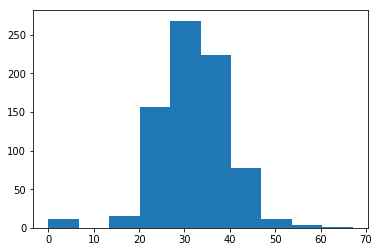

In [35]:
plt.hist(list(diabetes_data['BMI']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7db914e160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7db914ea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7db91bffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7db9154390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7db91547f0>],
 'means': []}

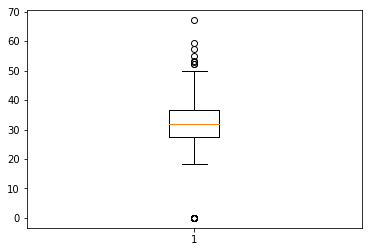

In [36]:
plt.boxplot(diabetes_data['BMI'])

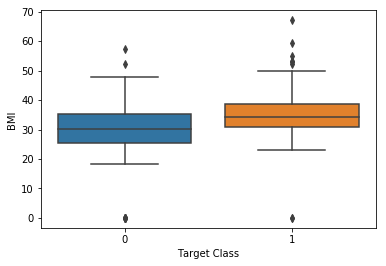

In [37]:
sbn.boxplot('Target Class', 'BMI', data = diabetes_data)

## Outlier Analysis

In [38]:
x = None
if(x):
    print("Not None")
if(not x):
    print(x)

None


In [124]:
def plotting(plot_type = None, feature = None,\
             data = diabetes_data, x = None, y = None):
    #If the two axis are specifically mentioned
    if((x and y) and (type(x) == list and type(y) == list)):
        plt.plot(x, y)
        plt.ylabel(feature)
        plt.xlabel("Indices")
        
    elif(plot_type == 'Box Plot'):
        plt.boxplot(data[feature])
    elif(plot_type == 'Box Plot w.r.t. Target'):
        if(feature in data.columns):
            sbn.boxplot('Target Class', feature, data = data)
    plt.show()

In [40]:
def outlier_analysis(data, feature):
    #Plot the box_plot
    #plotting(data[feature], 'Box Plot')
    plotting('Box Plot w.r.t. Target', feature, data)
    
    #IQR
    q25, q75 = np.percentile(data[feature], [25, 75])
    IQR = q75 - q25
    
    #Get the outliers
    lower_bound, upper_bound = q25 - (1.5 * IQR), q75 + (1.5 * IQR)
    lower_outliers = data.loc[data[feature]<=lower_bound, feature]
    upper_outliers = data.loc[data[feature]>=upper_bound, feature]
    
    #print("Lower Outlier:- {}" .format(lower_outliers))
    #print("Upper Outliers:- {}" .format(upper_outliers))
    

## Logistic Regression

### Assumptions:- 

##### The log odds ratio is a linear relationship of independent variable
##### There does not exist any multicollinearity amongst independent variables
##### Target variable consists of only two classes (Dependent Variable must be Binary)
##### Sample size must be large

In [41]:
def get_numpy_data(data, features, target=None):
    #Add a constant feature
    data['Constant'] = 1
    features = ['Constant'] + features
    
    feature_matrix = np.array(data[features])
    
    if(target):
        target_class = np.array(data[target])
    
        return (feature_matrix, target_class)
    else:
        return (feature_matrix)

In [42]:
def compute_probability(weights, feature_matrix):
    score = np.dot(feature_matrix, weights)
    
    probability = ((1 + np.e**((-1) * score)) ** -1)
    
    return probability

In [43]:
def get_derivative(error, feature):
    return np.dot(feature, error)

In [190]:
def get_prediction_class(probability, threshold):
    result = (probability >= threshold)
    
    return list(map(lambda x: +1 if(x) else 0, result))

In [140]:
print(np.log(np.e ** 10))

10.0


In [155]:
def log_likelihood(indicator, feature_matrix, coefficients):
    #Calculate score
    score = np.dot(feature_matrix, coefficients)
    
    #Calculate likelihood
    log_likelihood = np.sum(score * (indicator - 1) - np.log(1 + np.e**(score)))
    
    return (log_likelihood)

In [150]:
def logistic_regression(initial_weights, feature_matrix, target_values,\
                        features, max_iter = 10, step_size = 0.1, max_likelihood = 1e20):
    converged = False
    itr = 0
    indicator = (target_values == +1)
    
    #Initialize the coefficients
    coefficients = initial_weights
    
    #Store the derivatives and coefficients for each of the features
    coefficients_df = pd.DataFrame(columns = features)
    derivatives_df = pd.DataFrame(columns = features)
    
    #Stop when maximum iterations are reached
    while(not converged):
        #Store the derivatives and coefficients all the features
        derivatives_store, coefficients_store = [], []
        
        #Simultaneous update for all the features   
        for j in range(feature_matrix.shape[1]):
            #Get Probability of Prediction
            probability = compute_probability(coefficients, feature_matrix)
            
            #Calculate Error
            error = (indicator - probability)
    
            #Compute Derivative
            derivative = get_derivative(error, feature_matrix[:, j])
            derivatives_store.append(derivative)
            
            #Update the weights
            coefficients[j] += (step_size*derivative)
            coefficients_store.append(coefficients[j])
        
        #Reshape the coeff
        coefficients_store, derivatives_store = list(map(np.array,\
                                                [coefficients_store,\
                                                 derivatives_store]))
        coefficients_store, derivatives_store = list(map(lambda x:\
                                               x.reshape(1, len(features)),\
                                               [coefficients_store,\
                                                 derivatives_store]))
        
        #Append the coefficients and the derivative to the final set
        temp_coeff_df = pd.DataFrame(np.array(coefficients_store),\
                                          columns=features)
        temp_deriv_df = pd.DataFrame(np.array(derivatives_store),\
                                         columns=features)
        coefficients_df = pd.concat([coefficients_df, temp_coeff_df])
        derivatives_df = pd.concat([derivatives_df, temp_deriv_df])
        
        #derivative_df.iloc[itr, :] = derivatives_store
        itr += 1
        
        if(itr == max_iter):
            converged = True
            
        #Check the maximum likelihood
        
        likelihood = log_likelihood(indicator, feature_matrix,\
                                    coefficients)
        if(likelihood >= max_likelihood):
            print("Maximum Likelihood reached:- %.2f" %(likelihood))
            converged = True
    
    return (coefficients_df, derivatives_df)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.iloc[:, :-1],
                                                   diabetes_data["Target Class"],
                                                   test_size = 0.20,
                                                   random_state = 42)
print("X_train:- {}\ty_train:- {}\n X_test:- {}\ty_test:- {}"\
     .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:- (614, 8)	y_train:- (614,)
 X_test:- (154, 8)	y_test:- (154,)


In [89]:
X_train.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age (Years)
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [90]:
pd.DataFrame(y_train, columns=['Target Class'])

,Target Class
60,0
618,1
346,0
294,0
231,1
340,0
535,1
306,1
718,0
90,0


In [91]:
train_data = pd.concat([X_train, pd.DataFrame(y_train, columns=['Target Class'])],\
                       axis = 1)
test_data = pd.concat([X_test, pd.DataFrame(y_test, columns=['Target Class'])], axis = 1)

print(train_data.shape)
print(test_data.shape)

(614, 9)
(154, 9)


In [92]:
features = diabetes_data.columns.tolist()[:-1]
features

['Number of times pregnant',
 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
 'Diastolic blood pressure (mm Hg)',
 'Triceps skin fold thickness (mm)',
 '2-Hour serum insulin (mu U/ml)',
 'BMI',
 'Diabetes pedigree function',
 'Age (Years)']

In [93]:
feature_matrix_train, target_train = get_numpy_data(train_data,\
                                       features,\
                                       'Target Class')

In [94]:
feature_matrix_test, target_test = get_numpy_data(test_data,\
                                      diabetes_data.columns.tolist()[:-1],\
                                       'Target Class')

In [95]:
feature_matrix_train.shape

(614, 9)

In [96]:
feature_matrix_test.shape

(154, 9)

In [97]:
if('Constant' not in features):
    features = ['Constant'] + diabetes_data.columns.tolist()[:-1]
features

['Constant',
 'Number of times pregnant',
 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
 'Diastolic blood pressure (mm Hg)',
 'Triceps skin fold thickness (mm)',
 '2-Hour serum insulin (mu U/ml)',
 'BMI',
 'Diabetes pedigree function',
 'Age (Years)']

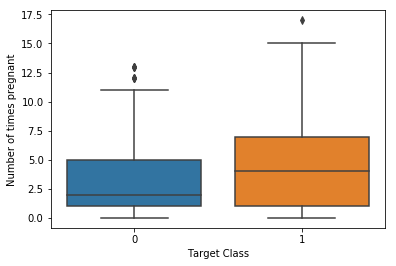

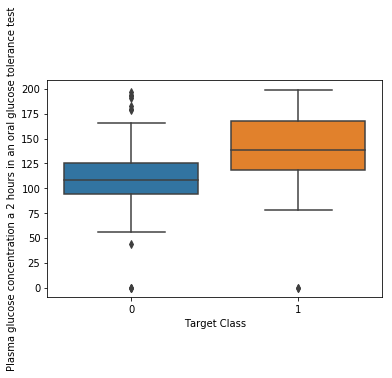

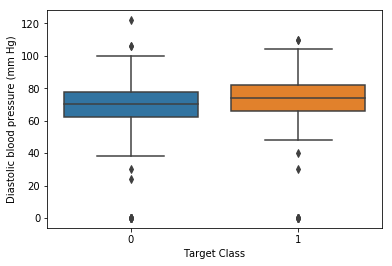

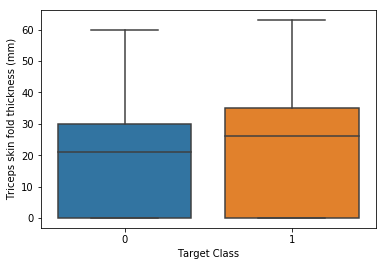

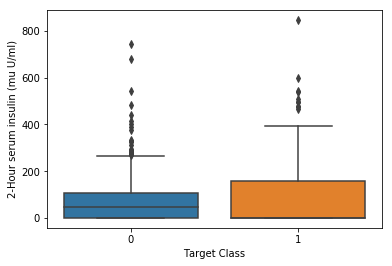

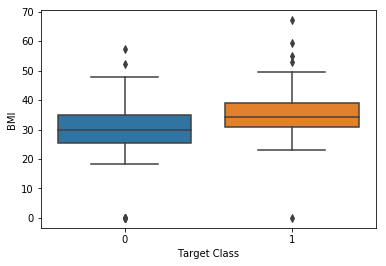

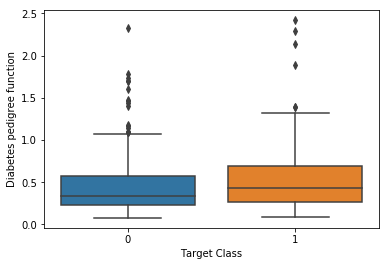

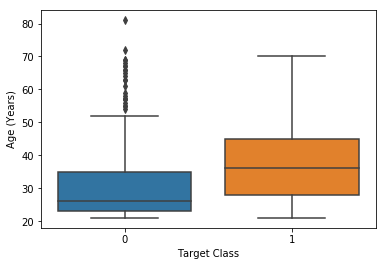

[None, None, None, None, None, None, None, None]

In [98]:
[outlier_analysis(train_data, fea) for fea in features[1:]]

In [99]:
#Adding the weight for the constant feature
initial_coefficients = np.zeros(len(features))
initial_coefficients

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [156]:
##Default threshold for convergence = 1e20
#Default iterations = 10
coefficients_10, derivatives_10 = logistic_regression(initial_coefficients, feature_matrix_train,\
                                                target_train, features, step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [222]:
#Default threshold for convergence = 1e20
coefficients_100, derivatives_100 = logistic_regression(initial_coefficients, feature_matrix_train,\
                                                target_train, features, max_iter = 100, step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [227]:
#Default threshold for convergence = 1e20
coefficients_1000, derivatives_1000 = logistic_regression(initial_coefficients, feature_matrix_train,\
                                                target_train, features, max_iter = 1000, step_size = 0.1)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [108]:
coefficients_100

,Constant,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age (Years)
0,-54.778113,1378.640776,1387.746443,-6044.554310,2533.966810,599.199695,156.638215,49.052351,3743.250175
0,-56.078113,1387.940776,1336.746368,-5812.854309,2320.266810,-1124.500305,741.778215,57.489451,4282.250175
0,-43.578113,1445.540776,3153.546368,-7395.454309,2307.966810,-43.400305,129.678215,50.204151,3731.550175
0,-57.478113,1395.740777,1401.446368,-5993.554309,2541.966810,742.199695,32.658215,48.751251,3696.350175
0,-60.978113,1398.540777,1088.246368,-5585.654309,2349.066810,-981.600305,652.638215,57.930251,4298.850175
0,-46.678113,1468.240777,3139.046368,-7505.654309,2329.066810,-57.797230,118.688215,51.412851,3804.450175
0,-59.278113,1422.040777,1525.146386,-6130.154309,2535.166810,621.702770,30.448215,49.792751,3760.050175
0,-62.778113,1424.340777,1194.046386,-5641.554309,2344.466810,-1025.297230,628.868215,58.727751,4339.150175
0,-49.778113,1484.240777,3078.046386,-7422.754309,2350.266810,21.702772,45.668215,51.877251,3824.750175
0,-62.778113,1436.740777,1409.846386,-6058.654309,2560.966810,570.702772,53.958215,51.540951,3851.050175


In [109]:
derivatives_100

,Constant,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age (Years)
0,-133.000000,-479.000000,-16864.000000,13711.000000,2048.000000,5584.000000,94.700000,-4.083000,322.000000
0,-13.000000,93.000000,-510.000743,2317.000003,-2137.000000,-17237.000000,5851.400000,84.371000,5390.000000
0,125.000000,576.000000,18168.000000,-15826.000000,-123.000000,10811.000000,-6121.000000,-72.853000,-5507.000000
0,-139.000000,-497.999991,-17521.000000,14019.000000,2340.000000,7856.000000,-970.200000,-14.529000,-352.000000
0,-35.000000,28.000000,-3132.000000,4079.000000,-1929.000000,-17238.000000,6199.800000,91.790000,6025.000000
0,143.000000,697.000000,20508.000000,-19200.000000,-200.000000,9238.030757,-5339.500000,-65.174000,-4944.000000
0,-126.000000,-462.000000,-16138.999828,13755.000000,2061.000000,6795.000000,-882.400000,-16.201000,-444.000000
0,-35.000000,23.000000,-3311.000000,4886.000000,-1907.000000,-16470.000000,5984.200000,89.350000,5791.000000
0,130.000000,599.000000,18840.000000,-17812.000000,58.000000,10470.000021,-5832.000000,-68.505000,-5144.000000
0,-130.000000,-475.000000,-16682.000000,13641.000000,2107.000000,5490.000000,82.900000,-3.363000,263.000000


In [73]:
derivatives['Constant'].tolist()

[-94.0, 48.0, 202.0, -112.0, 188.0, -167.0, -97.0, 212.0, -17.0, -139.0]

### Plot the derivative for the variables

In [121]:
derivatives_10['Constant'].name

'Constant'

In [125]:
#For 10 iterations
def plotting_util(data):
    for feature in data.columns.tolist():
#Parameters
# plot_type, , feature, data, x, y
        plotting(None, feature, None, list(range(1, data.shape[0] + 1)),\
             data[feature].tolist())

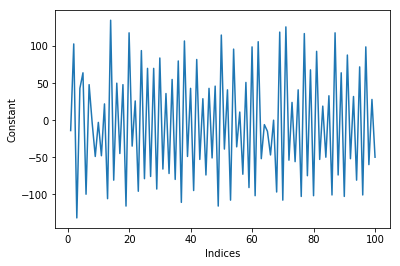

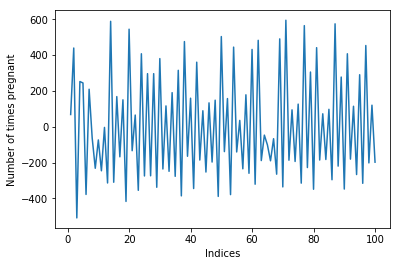

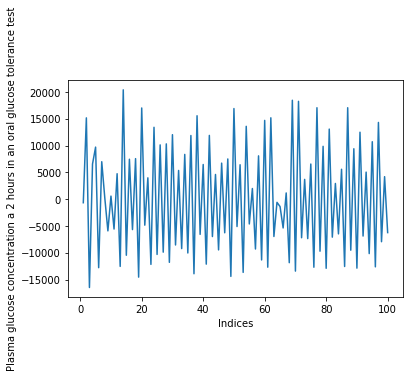

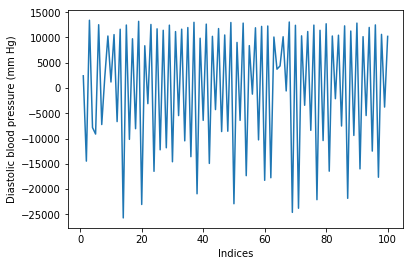

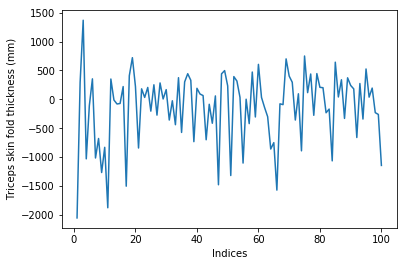

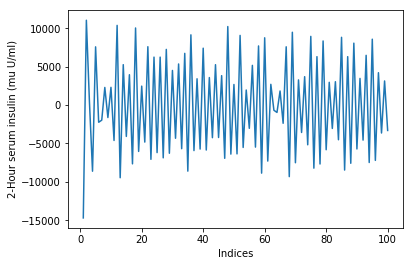

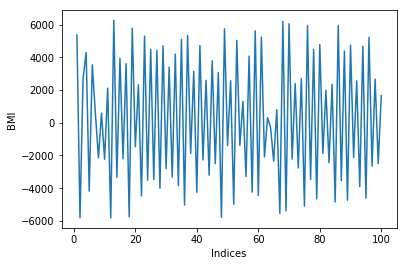

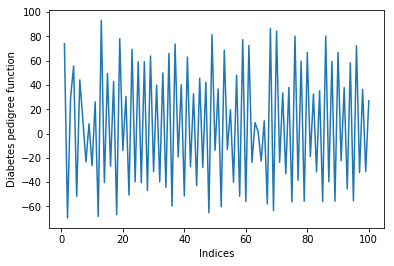

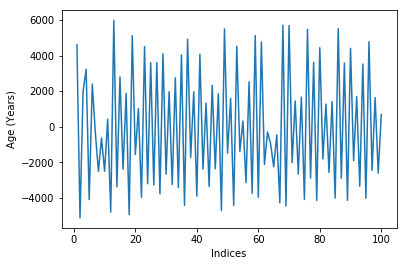

In [160]:
plotting_util(derivatives_100)

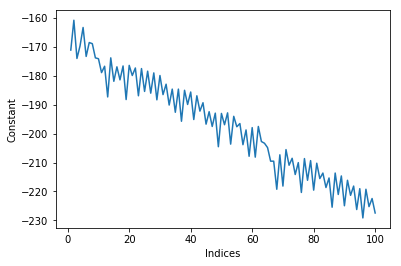

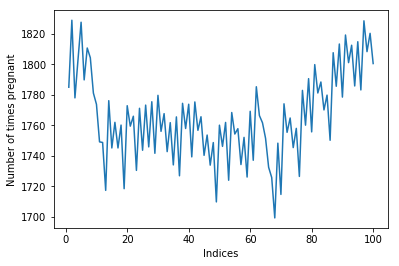

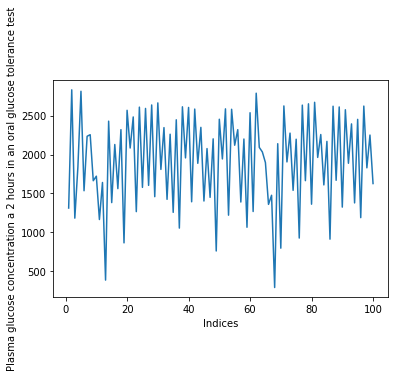

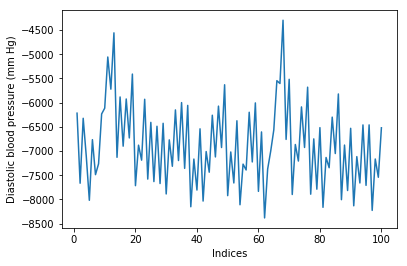

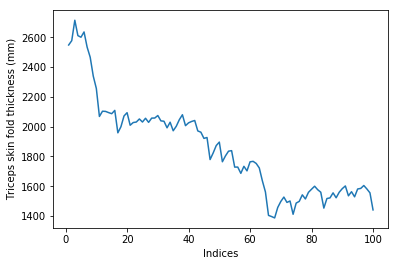

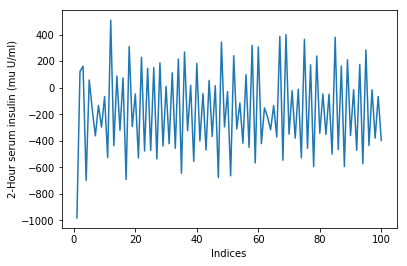

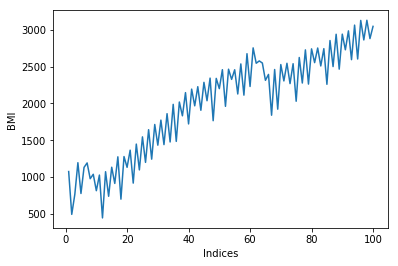

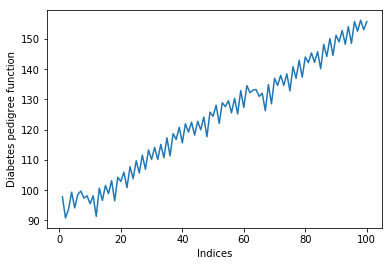

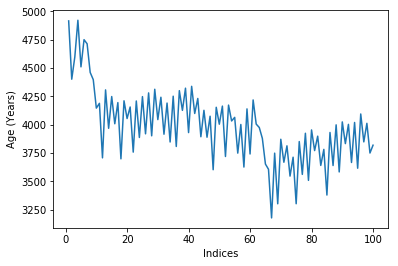

In [161]:
##Plotting the coefficients obtained after 10 iterations
plotting_util(coefficients_100)

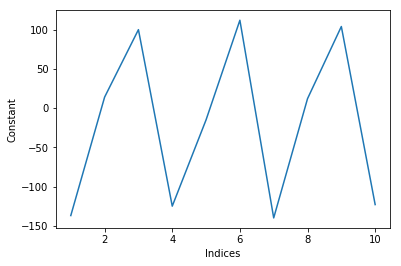

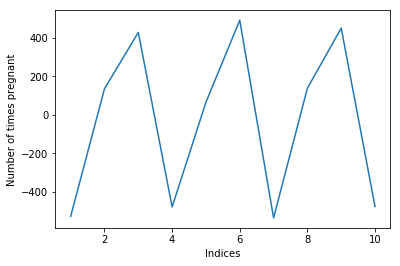

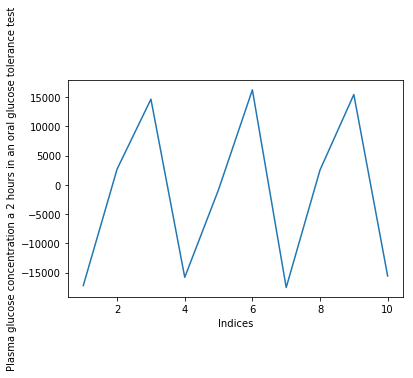

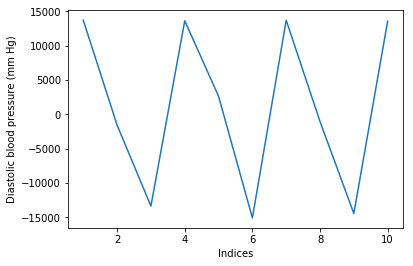

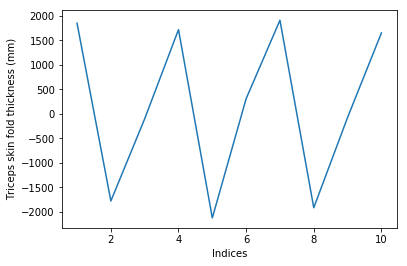

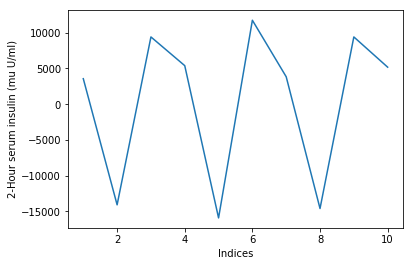

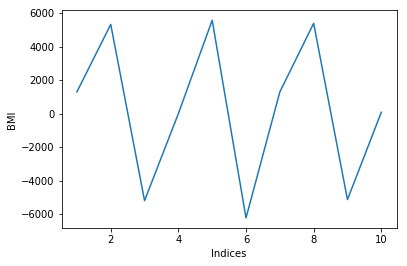

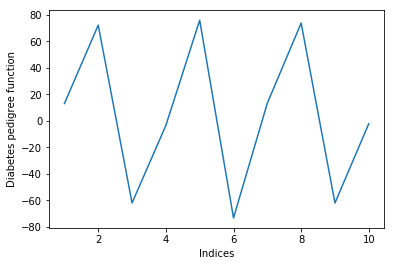

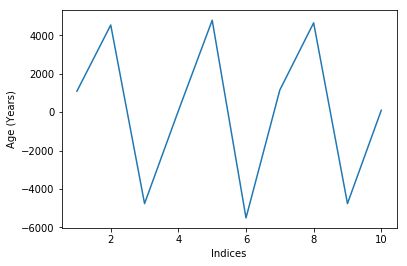

In [162]:
plotting_util(derivatives_10)

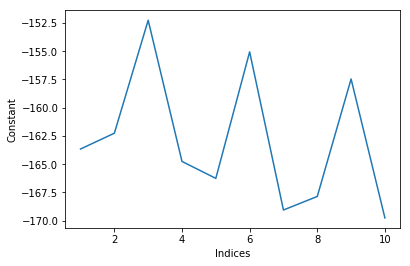

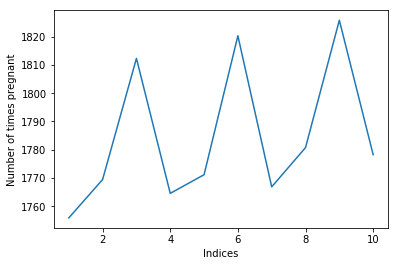

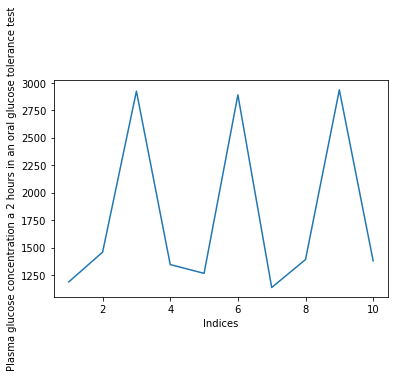

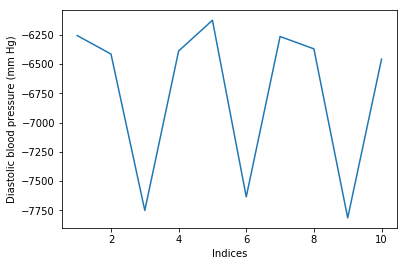

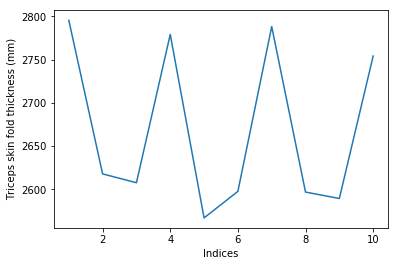

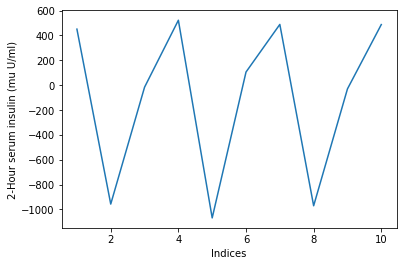

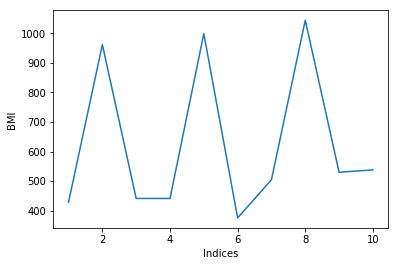

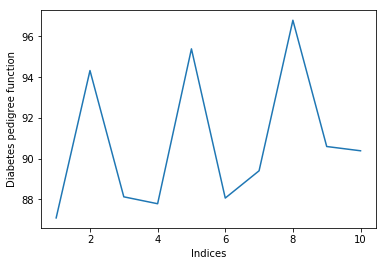

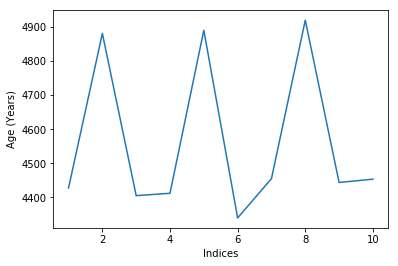

In [163]:
##Plotting the coefficients obtained after 10 iterations
plotting_util(coefficients_10)

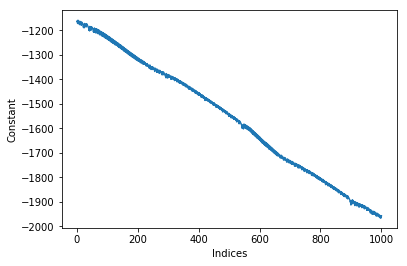

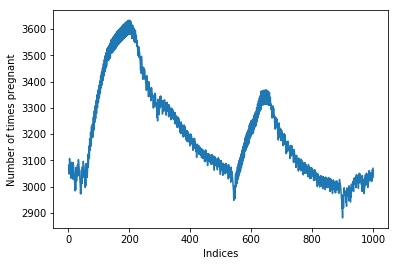

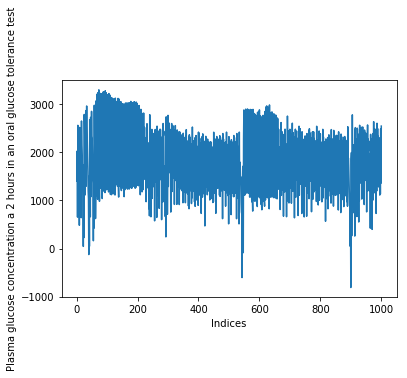

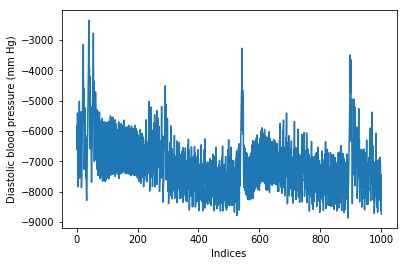

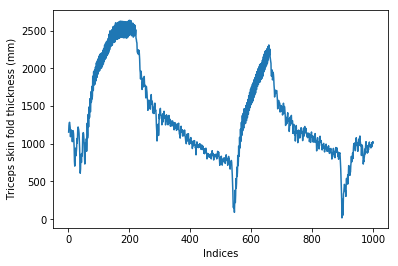

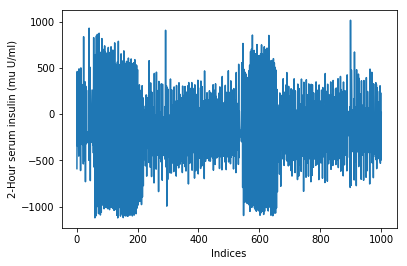

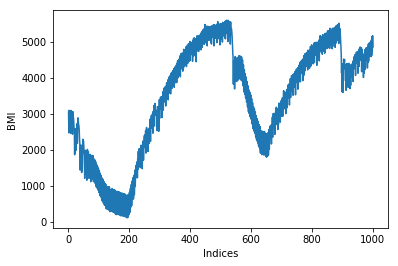

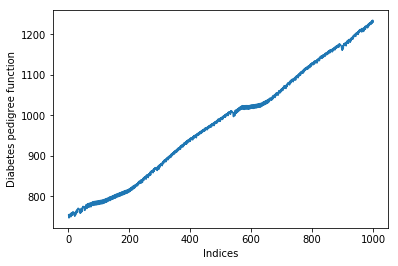

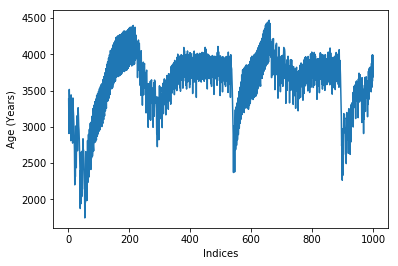

In [229]:
plotting_util(coefficients_1000)

In [166]:
#Obtain the prediction for the test set using the coefficients_100
#and derivative_100
learned_coefficients = coefficients_100.iloc[-1, :].tolist()
learned_coefficients

[-227.43742292910787,
 1800.5577102516995,
 1627.4811314705612,
 -6518.978393346628,
 1440.8836909036247,
 -397.8137888002218,
 3046.9302495954125,
 155.73457374948765,
 3819.63406558836]

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


In [214]:
#Predictions for certain set of threshold values

def prediction_results(feature_matrix, coefficients):
    score = np.dot(feature_matrix_test, np.array(coefficients))
    
    predict_probability_test =  (1 + np.e**(score))**(-1)
    
    prediction_test = get_prediction_class(predict_probability_test, \
                                       np.array(len(predict_probability_test)*[0.5]))
    
    #Confusion Matrix
    CM = confusion_matrix(y_test, prediction_test)
    print("Confusion Matrix:-\n{}" .format(CM))
    
    #Positive class is 1 and negative is 0
    #Accuracy
    print("Accuracy:-\n%.2f" %(CM.diagonal().sum()/ CM.sum()))
    
    #Precision
    print("Precision:-\n%.2f" %(CM[0, 0] / (CM[0, 0] + CM[1, 0])))
    
    #Recall
    print("Recall:-\n%.2f" %(CM[1, 1]/ (CM[1, 1] + CM[0, 1])))

In [220]:
#Prediction Results with 10 iterations
prediction_results(feature_matrix_test, coefficients_10.iloc[-1, :])

Confusion Matrix:-
[[29 70]
 [36 19]]
Accuracy:-
0.31
Precision:-
0.45
Recall:-
0.21


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [216]:
#help(confusion_matrix)

In [219]:
#Prediction Results with 100 iterations
prediction_results(feature_matrix_test, coefficients_100.iloc[-1, :])

Confusion Matrix:-
[[30 69]
 [24 31]]
Accuracy:-
0.40
Precision:-
0.56
Recall:-
0.31


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [230]:
#Prediction Results with 1000 iterations
prediction_results(feature_matrix_test, coefficients_1000.iloc[-1, :])

Confusion Matrix:-
[[35 64]
 [39 16]]
Accuracy:-
0.33
Precision:-
0.47
Recall:-
0.20


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [194]:
accuracy_score(y_test, prediction_test)

0.3961038961038961